<a href="https://colab.research.google.com/github/Pushpa-Harshitha05/NLP_Lab/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Intercept:  3.764732994140413
Slope:  1.6880505415022047

Test set of X:
[[9]
 [2]]

Test set of Y:
[[18.23264593]
 [ 5.16355593]]

Predicted Y:
[[18.95718787]
 [ 7.14083408]]

Mean Squared Error:  2.2172949481527175
Mean Absolute Error:  1.3509100418883841


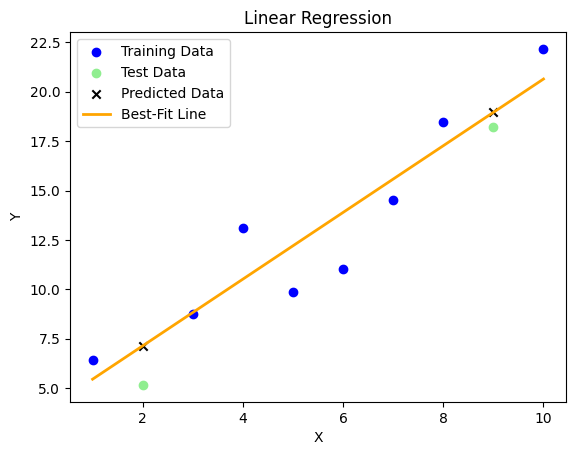

In [ ]:
class SimpleLinearRegression:
  def __init__(self):
    self.intercept = 0
    self.slope = 0

  def fit(self, x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)

    self.slope =  numerator / denominator
    self.intercept = y_mean - (self.slope * x_mean)

  def predict(self, x):
    return self.intercept + (self.slope * x)


class Metrics:
  def __init__(self, y_true, y_pred):
    self.y_true = y_true
    self.y_pred = y_pred

  def mean_squared_error(self):
    return (np.sum((self.y_true - self.y_pred) ** 2)) / len(self.y_true)

  def mean_absolute_error(self):
    return np.sum(np.abs(self.y_true - self.y_pred)) / len(self.y_true)



X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)   # reshape(-1,1) changes the array into 2d with 10 rows and one column.
Y = 2*X + 1 + np.random.normal(0, 2, size=X.shape)   # the noise is calculated using samples from a gaussian distribution.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = SimpleLinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Intercept: ",model.intercept)
print("Slope: ",model.slope)
print()

print("Test set of X:")
print(X_test)
print()
print("Test set of Y:")
print(Y_test)
print()
print("Predicted Y:")
print(y_pred)
print()

mse = Metrics(Y_test, y_pred)
print("Mean Squared Error: ",mse.mean_squared_error())
print("Mean Absolute Error: ",mse.mean_absolute_error())

X_line = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # Smooth X range
y_line = model.predict(X_line)  # Compute Y values using the model

plt.scatter(X_train, Y_train, color="blue", label="Training Data")  # Training points
plt.scatter(X_test, Y_test, color='lightgreen', label="Test Data")  # Test points
plt.scatter(X_test, y_pred, color='black', marker="x", label="Predicted Data")  # Predictions
plt.plot(X_line, y_line, color="orange", linewidth=2, label="Best-Fit Line")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression")
plt.legend()

plt.show()